# Завантаження датасету

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


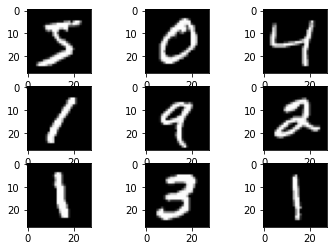

In [31]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
(trainX, trainY), (testX, testY) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()


# Підготовка та нормування датасету

In [32]:
from tensorflow.keras.utils import to_categorical
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.0
testX = testX / 255.0

# Визначення моделі згорткової нейронної мережі

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras import layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Тренування моделі та оцінка її точності за допомогою 4-кратного перехресного затвердження

In [34]:
from sklearn.model_selection import KFold
scores, histories = list(), list()
kfold = KFold(4, shuffle=True, random_state=1)
for train_ix, test_ix in kfold.split(trainX):
		trainx, trainy, testx, testy = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]
		history = model.fit(trainx, trainy, epochs=10, batch_size=32, 
                      validation_data=(testx, testy), verbose=2)
		_, acc = model.evaluate(testx, testy, verbose=2)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)

Epoch 1/10
1407/1407 - 4s - loss: 0.1970 - accuracy: 0.9386 - val_loss: 0.0914 - val_accuracy: 0.9748
Epoch 2/10
1407/1407 - 4s - loss: 0.0661 - accuracy: 0.9797 - val_loss: 0.0732 - val_accuracy: 0.9794
Epoch 3/10
1407/1407 - 4s - loss: 0.0422 - accuracy: 0.9867 - val_loss: 0.0779 - val_accuracy: 0.9773
Epoch 4/10
1407/1407 - 4s - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.0620 - val_accuracy: 0.9826
Epoch 5/10
1407/1407 - 4s - loss: 0.0189 - accuracy: 0.9946 - val_loss: 0.0597 - val_accuracy: 0.9831
Epoch 6/10
1407/1407 - 4s - loss: 0.0130 - accuracy: 0.9960 - val_loss: 0.0637 - val_accuracy: 0.9821
Epoch 7/10
1407/1407 - 4s - loss: 0.0094 - accuracy: 0.9975 - val_loss: 0.0564 - val_accuracy: 0.9849
Epoch 8/10
1407/1407 - 4s - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.0870 - val_accuracy: 0.9770
Epoch 9/10
1407/1407 - 4s - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0596 - val_accuracy: 0.9851
Epoch 10/10
1407/1407 - 4s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0565 - 

# Зображення графіків функції втрат та точності класифікації

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


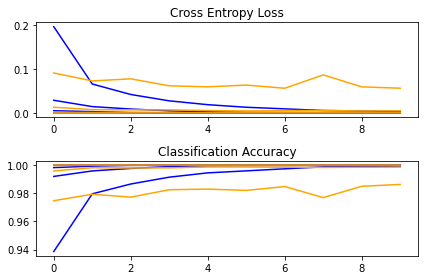

In [35]:
for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.tight_layout()
plt.show()

# Збереження натренованої моделі

In [36]:
model.save('content/drive/MyDrive/project/my_model')

INFO:tensorflow:Assets written to: content/drive/MyDrive/project/my_model/assets


# Завантаження натренованої моделі та реалізація режиму розпізнавання

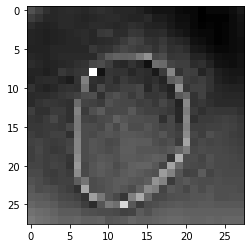

Розпізнана цифра:  0


In [50]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np


model = load_model('/content/content/drive/MyDrive/project/my_model')   
img = load_img('drive/MyDrive/project/0.jpg', color_mode="grayscale", target_size=(28, 28))
img = np.invert(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()
img = img_to_array(img)
img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')
img = img / 255.0
digit = np.argmax(model.predict(img), axis=-1)
print("Розпізнана цифра: ", digit[0])

# Висновки
Натренована модель показала дуже гарну точність на тестових даних з датасету Mnist - точність розпізнавання доходила до 100%. При розпізнаванні власноруч зроблених фото модель показувала меншу точність. Дані результати можуть бути пояснені багатьма факторами, як то: 
- якість фото, забезпечене камерою;
- освітлення, тіні;
- папір та колір ручки, наскільки жирним вийшов контур цифри (можна бачити, що цифри з датасету мають значно більший контур, ніж написані власноруч);
- процес стискання фото до розміру 28х28 тощо.

Але навіть за таких умов модель досить добре розпізнала деякі власноруч написані цифри, як то 0, 3, 8 і плутала цифри, що досить схожі одне на одну (5 і 6, 6 та 8 тощо).
Напрямками для поліпшення розпізнавання цифр, що не знаходяться в датасеті Mnist є:
- збільшення розміру написанної цифри (її висоти та ширини);
- збільшення якості фото;
- ускладення структури нейронної мережі для більш ефективного розпізнавання образів, що не знаходяться у вибірці.